In [45]:
import os
import sys
src_dir = os.path.join('..', 'src')
sys.path.append(os.path.abspath(src_dir))

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from data import path, get_dataset

In [2]:
data = get_dataset('num_comments.csv')

../../data/datasets/num_comments.csv


In [3]:
data.num_comments.mean()

162.31641307700215

<AxesSubplot:xlabel='num_comments', ylabel='Count'>

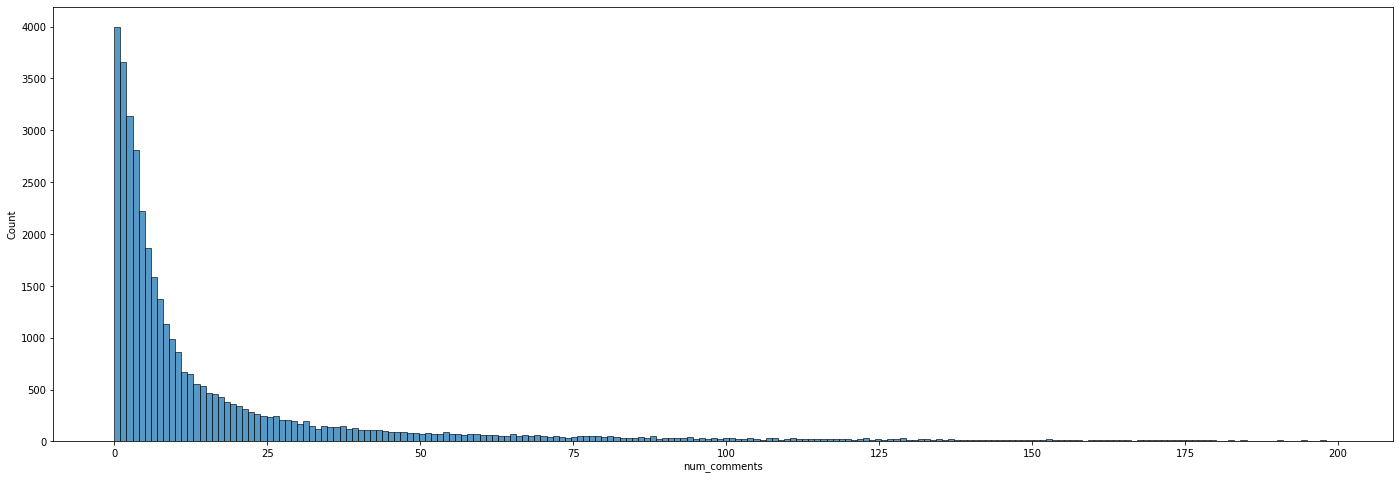

In [21]:
plt.subplots(figsize=(24,8))
sns.histplot(data[data.num_comments < 200], x='num_comments', bins=200)

In [43]:
# data[data.num_comments < data.num_comments.quantile(0.2)]

In [22]:
data[data.num_comments < 200].shape[0]

37109

In [39]:
data.num_comments.quantile(0.20)

2.0

In [64]:
def sample_submissions(df, step: float = 0.05, values_per_step: int = 500, seed: int = 130759, verbose: bool = False) -> pd.DataFrame:
    result_df = pd.DataFrame()
    
    for percentail in [round(x / 100.0, 2) for x in range(0, 100, int(step*100))]:
        
        subset = df[
            (df.num_comments >= df.num_comments.quantile(percentail)) & 
            (df.num_comments < df.num_comments.quantile(min(1.0, percentail + step)))
        ]
        
        sample = subset.sample(min(values_per_step, subset.shape[0]), random_state=seed)
        result_df = result_df.append(sample)
        
        print(f'{subset.shape[0]}\t samples between ({percentail}, {round(percentail+step, 2)}) quantile') if verbose else None
    
    if verbose:
        print(f'{result_df.shape[0]} samples has been chosen.')
        plt.subplots(figsize=(24,8))
        sns.histplot(result_df[result_df.num_comments < 200], x='num_comments', bins=200)
        
    return result_df

0	 samples between (0.0, 0.05) quantile
0	 samples between (0.05, 0.1) quantile
3994	 samples between (0.1, 0.15) quantile
3659	 samples between (0.15, 0.2) quantile
0	 samples between (0.2, 0.25) quantile
3134	 samples between (0.25, 0.3) quantile
2808	 samples between (0.3, 0.35) quantile
0	 samples between (0.35, 0.4) quantile
2217	 samples between (0.4, 0.45) quantile
3449	 samples between (0.45, 0.5) quantile
1372	 samples between (0.5, 0.55) quantile
2116	 samples between (0.55, 0.6) quantile
2188	 samples between (0.6, 0.65) quantile
2025	 samples between (0.65, 0.7) quantile
2115	 samples between (0.7, 0.75) quantile
1954	 samples between (0.75, 0.8) quantile
1981	 samples between (0.8, 0.85) quantile
1992	 samples between (0.85, 0.9) quantile
1953	 samples between (0.9, 0.95) quantile
1950	 samples between (0.95, 1.0) quantile
8000 samples has been chosen.


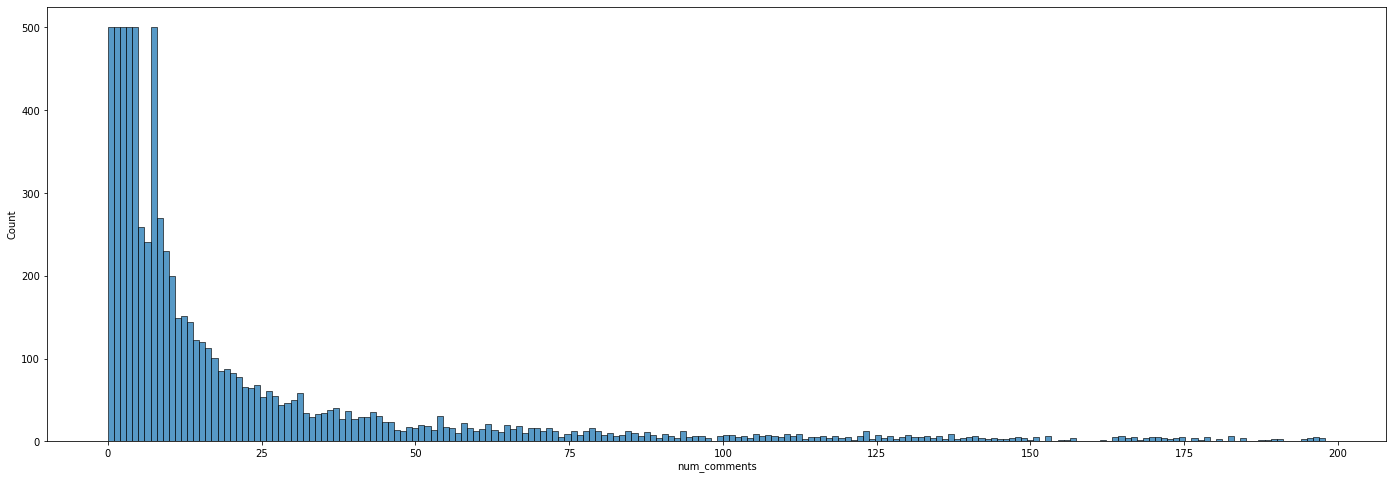

In [65]:
sampled_df = sample_submissions(data, verbose=True)

In [69]:
sampled_df.num_comments.median()

9.5

In [70]:
sampled_df.num_comments.sum()

1645793

In [71]:
sampled_df.num_comments[sampled_df.num_comments < sampled_df.num_comments.quantile(0.99)].sum()

373233

In [72]:
sampled_df.num_comments[sampled_df.num_comments < sampled_df.num_comments.quantile(0.99)].shape

(7920,)

In [73]:
sampled_df.num_comments.quantile(0.99)

1701.140000000003